In [6]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import json
d= pd.read_csv('maryland.csv') 

C:\Users\srina\AppData\Local\Temp\ipykernel_14068\3502058163.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  d= pd.read_csv('maryland.csv')


In [7]:
df = d[['ACRS Report Type','Crash Date/Time','Weather','Light','Injury_Severity','Vehicle_Damage_Extent','Speed_Limit']]
df = df.dropna(axis=0)

In [8]:
def Accident_Severity_Function(q):
    if q == 'Property Damage Crash':
        return 1
    if q == 'Injury Crash':
        return 2
    if q == 'Fatal Crash':
        return 3

In [9]:
df['Accident_Severity'] = df['ACRS Report Type'].apply(Accident_Severity_Function)
df = df.drop(columns=['ACRS Report Type'])
df.head()

,Crash Date/Time,Weather,Light,Injury Severity,Vehicle Damage Extent,Speed Limit,Accident_Severity
0,09/26/2019 07:20:00 AM,CLEAR,DAYLIGHT,NO APPARENT INJURY,SUPERFICIAL,15,1
1,06/18/2020 02:00:00 AM,CLOUDY,UNKNOWN,NO APPARENT INJURY,UNKNOWN,35,1
2,09-08-2021 12:30,CLEAR,DAYLIGHT,NO APPARENT INJURY,SUPERFICIAL,0,1
3,04/19/2020 03:39:00 PM,CLEAR,DAYLIGHT,NO APPARENT INJURY,DISABLING,25,1
4,04/20/2020 09:15:00 AM,CLOUDY,DAYLIGHT,POSSIBLE INJURY,DISABLING,25,2


<Axes: >

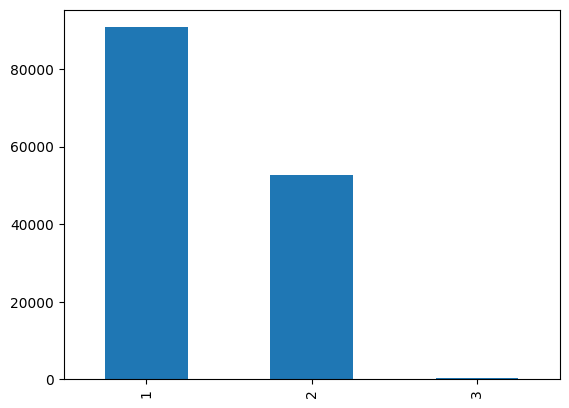

In [11]:
df['Accident_Severity'].value_counts().plot(kind='bar')

In [13]:
def dateWithDashFunction(q):
    q = str(q)
    q = q[:10]
    q = q.replace("/", "-")
    return q
df['DateDash'] = df['Crash Date/Time'].apply(dateWithDashFunction)

In [14]:
from datetime import datetime
def isWeekend(q):
    month = q[:2]
    day = q[3:5]
    year = q[8:]
    date = month+'-'+day+'-'+year
    datetime_object = datetime.strptime(date, '%m-%d-%y')
    if datetime_object.weekday() == 5 or datetime_object.weekday() == 6:
        return 1
    else:
        return 0
df['isWeekend'] = df['DateDash'].apply(isWeekend)

In [27]:
weekendRatio = df['isWeekend'].sum()/216
print(weekendRatio)
weekdayRatio = (143697 - int(df['isWeekend'].sum()))/514
print(weekdayRatio)
print(df.count())

150.0787037037037
216.49805447470817
Crash Date/Time          143697
Weather                  143697
Light                    143697
Injury Severity          143697
Vehicle Damage Extent    143697
Speed Limit              143697
Accident_Severity        143697
DateDash                 143697
isWeekend                143697
dtype: int64


<Axes: >

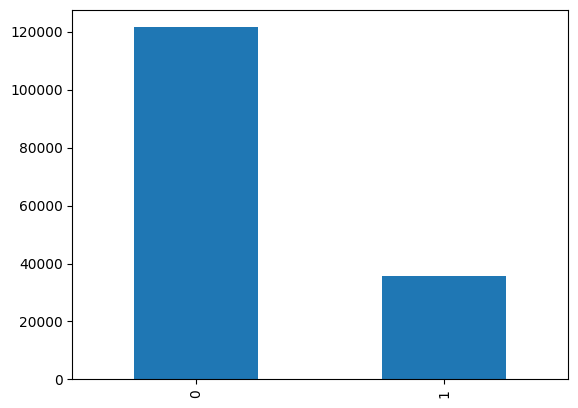

In [86]:
df['isWeekend'].value_counts().plot(kind='bar')

In [87]:
def timeFunction(q):
    if 'AM' in q:
        q = q[11:16]
        q = q.replace(":", "")
        hour = q[:2]
        if hour == '12':
            firstDigit = '0'
            secondDigit = '0'
            d1 = firstDigit
            d2 = secondDigit
            d3 = q[2]
            d4 = q[3]
            final = d1+d2+d3+d4
            return int(final)
    elif 'PM' in q:
        q = q[11:16]
        q = q.replace(":", "")
        hour = q[:2]
        if hour != '12':            
            hour = int(hour)
            hour = hour + 12
        firstDigit = str(hour)[0]
        secondDigit = str(hour)[1]
        d1 = firstDigit
        d2 = secondDigit
        d3 = q[2]
        d4 = q[3]
        final = d1+d2+d3+d4
        return int(final)
    else:
        q = q[11:16]
        q = q.replace(":", "")
    return int(q)

In [88]:
df['Time'] = df['Crash Date/Time'].apply(timeFunction)

In [89]:
def timeClassFunc1(val):
    if float(val) >= 0 and float(val) <= 100:
        return 1
    if float(val) >= 100 and float(val) <= 200:
        return 2
    if float(val) >= 200 and float(val) <= 300:
        return 3
    if float(val) >= 300 and float(val) <= 400:
        return 4
    if float(val) >= 400 and float(val) <= 500:
        return 5
    if float(val) >= 500 and float(val) <= 600:
        return 6
    if float(val) >= 600 and float(val) <= 700:
        return 7
    if float(val) >= 700 and float(val) <= 800:
        return 8
    if float(val) >= 800 and float(val) <= 900:
        return 9
    if float(val) >= 900 and float(val) <= 1000:
        return 10
    if float(val) >= 1000 and float(val) <= 1100:
        return 11
    if float(val) >= 1100 and float(val) <= 1200:
        return 12
    if float(val) >= 1200 and float(val) <= 1300:
        return 13
    if float(val) >= 1300 and float(val) <= 1400:
        return 14
    if float(val) >= 1400 and float(val) <= 1500:
        return 15
    if float(val) >= 1500 and float(val) <= 1600:
        return 16
    if float(val) >= 1600 and float(val) <= 1700:
        return 17
    if float(val) >= 1700 and float(val) <= 1800:
        return 18
    if float(val) >= 1800 and float(val) <= 1900:
        return 19
    if float(val) >= 1900 and float(val) <= 2000:
        return 20
    if float(val) >= 2000 and float(val) <= 2100:
        return 21
    if float(val) >= 2100 and float(val) <= 2200:
        return 22
    if float(val) >= 2200 and float(val) <= 2300:
        return 23
    if float(val) >= 2300 and float(val) <= 2359:
        return 24



def timeClassFunc2(val):
    if float(val) >= 0 and float(val) <= 200:
        return 1
    if float(val) >= 200 and float(val) <= 400:
        return 2
    if float(val) >= 400 and float(val) <= 600:
        return 3
    if float(val) >= 600 and float(val) <= 800:
        return 4
    if float(val) >= 800 and float(val) <= 1000:
        return 5
    if float(val) >= 1000 and float(val) <= 1200:
        return 6
    if float(val) >= 1200 and float(val) <= 1400:
        return 7
    if float(val) >= 1400 and float(val) <= 1600:
        return 8
    if float(val) >= 1600 and float(val) <= 1800:
        return 9
    if float(val) >= 1800 and float(val) <= 2000:
        return 10
    if float(val) >= 2000 and float(val) <= 2200:
        return 11
    if float(val) >= 2200 and float(val) <= 2359:
        return 12



def timeClassFunc3(val):
    if float(val) >= 0 and float(val) <= 300:
        return 1
    if float(val) >= 300 and float(val) <= 600:
        return 2
    if float(val) >= 600 and float(val) <= 900:
        return 3
    if float(val) >= 900 and float(val) <= 1200:
        return 4
    if float(val) >= 1200 and float(val) <= 1500:
        return 5
    if float(val) >= 1500 and float(val) <= 1800:
        return 6
    if float(val) >= 1800 and float(val) <= 2100:
        return 7
    if float(val) >= 2100 and float(val) <= 2359:
        return 8

In [90]:
df['Time_Class'] = df['Time'].apply(timeClassFunc1)

<Axes: >

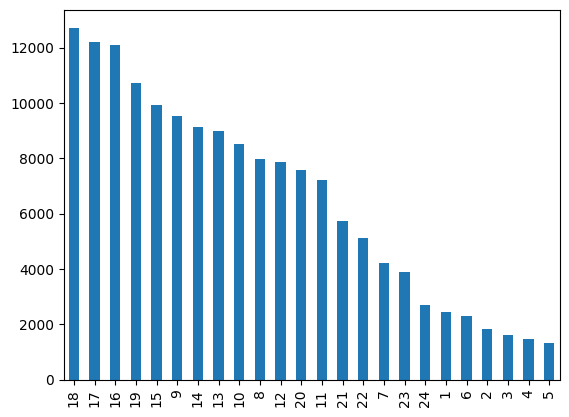

In [91]:
df['Time_Class'].value_counts().plot(kind='bar')

In [92]:
def weatherFunction(val):
    if val == 'OTHER' or val == 'UNKNOWN' or val == 'N/A':
        return 1
    if val == 'BLOWING SAND, SOIL, DIRT' or val == 'SEVERE WINDS' or val == 'BLOWING SNOW':
        return 2
    if val == 'CLEAR':
        return 3
    if val == 'CLOUDY' or val == 'FOGGY':
        return 4
    if val == 'RAINING':
        return 5
    if val == 'SNOW' or val == 'WINTRY MIX' or val == 'SLEET':
        return 6

In [93]:
df['Weather'] = df['Weather'].apply(weatherFunction)

In [94]:
def WeatherRemoveNullValues(val):
    if val != 1 and val !=2 and val != 3 and val!=4 and val!=5 and val!=6:
        return 7
    else:
        return val

In [95]:
df['Weather'] = df['Weather'].apply(WeatherRemoveNullValues)

<Axes: >

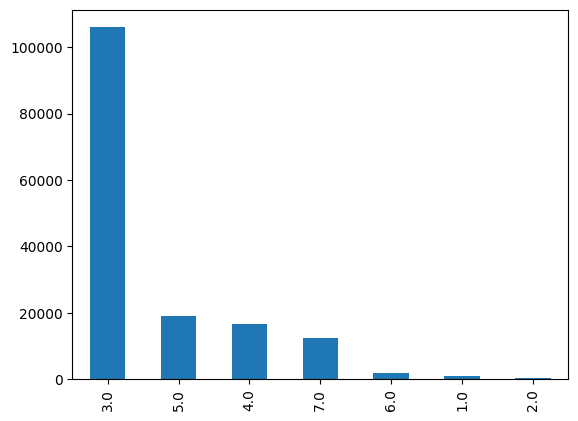

In [96]:
df['Weather'].value_counts().plot(kind='bar')

In [97]:
def lightFunction(val):
    if val == 'OTHER' or val == r'N/A' or val == 'UNKNOWN' :
        return 1
    elif val == 'DARK -- UNKNOWN LIGHTING' or val == 'DARK LIGHTS ON' or val == 'DARK NO LIGHTS':
        return 2
    elif val == 'DAWN' or val =='DUSK':
        return 3
    elif val == 'DAYLIGHT':
        return 4

In [98]:
df['Light'] = df['Light'].apply(lightFunction)

In [99]:
def isHoliday(q):
    holidays = [
                '01-01-2019',
                '01-21-2019',
                '02-14-2019',
                '02-18-2019',
                '03-17-2019',
                '04-15-2019',
                '04-21-2019',
                '04-24-2019',
                '05-12-2019',
                '05-27-2019',
                '06-16-2019',
                '07-04-2019',
                '09-02-2019',
                '10-14-2019',
                '10-31-2019',
                '11-11-2019',
                '11-28-2019',
                '11-29-2019',
                '12-24-2019',
                '12-25-2019',
                '12-31-2019',
                '01-01-2020',
                '01-20-2020',
                '02-14-2020',
                '02-17-2020',
                '03-17-2020',
                '04-12-2020',
                '04-15-2020',
                '04-22-2020',
                '05-10-2020',
                '05-25-2020',
                '06-21-2020',
                '07-03-2020',
                '07-04-2020',
                '09-07-2020',
                '10-12-2020',
                '10-31-2020',
                '11-03-2020',
                '11-11-2020',
                '11-26-2020',
                '11-27-2020',
                '12-24-2020',
                '12-25-2020',
                '12-31-2020'
                ]
    if q in holidays:
        return 1
    else:
        return 0

In [100]:
df['isHoliday'] = df['DateDash'].apply(isHoliday)

<Axes: >

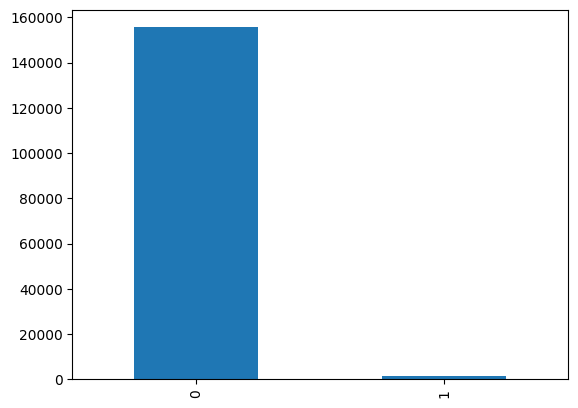

In [101]:
df['isHoliday'].value_counts().plot(kind='bar')

In [102]:
def elevationFunc(latitude, longitude):
    base_link = 'https://api.weather.gov/points/'+str(latitude)+','+str(longitude)
    while(True):
        base_link_response = requests.get(base_link)
        print('ran 1st')
        if base_link_response.status_code != 500:
            break
    json_base_link_response = json.loads(base_link_response.text)
    while(True):
        main_link_response = requests.get((json_base_link_response['properties'])['forecastHourly'])
        print('ran 2nd')
        if main_link_response.status_code != 500:
            break
    json_main_link_response = json.loads(main_link_response.text)
    return ((json_main_link_response['properties'])['elevation'])['value']


In [103]:
def InjurySeverityFunc(q):
    if q == 'NO APPARENT INJURY':
        return 1
    if q == 'SUSPECTED MINOR INJURY':
        return 2
    if q == 'POSSIBLE INJURY':
        return 3
    if q == 'SUSPECTED SERIOUS INJURY':
        return 4
    if q == 'FATAL INJURY':
        return 5
    
df['Injury Severity'] = df['Injury Severity'].apply(InjurySeverityFunc)

<Axes: >

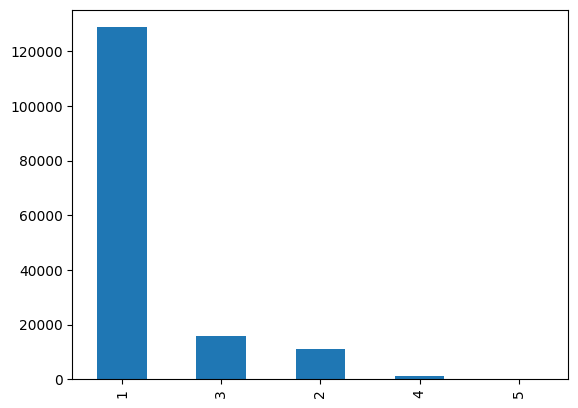

In [104]:
df['Injury Severity'].value_counts().plot(kind='bar')

In [105]:
def VehicleDamageExtentFunc(q):
    if q == 'NO DAMAGE' or q == r'N/A' or q == 'UNKNOWN' or q == 'OTHER':
        return 1
    if q == 'FUNCTIONAL':
        return 2
    if q == 'SUPERFICIAL':
        return 3
    if q == 'DISABLING':
        return 4
    if q == 'DESTROYED':
        return 5
    
df['Vehicle Damage Extent'] = df['Vehicle Damage Extent'].apply(VehicleDamageExtentFunc)

<Axes: >

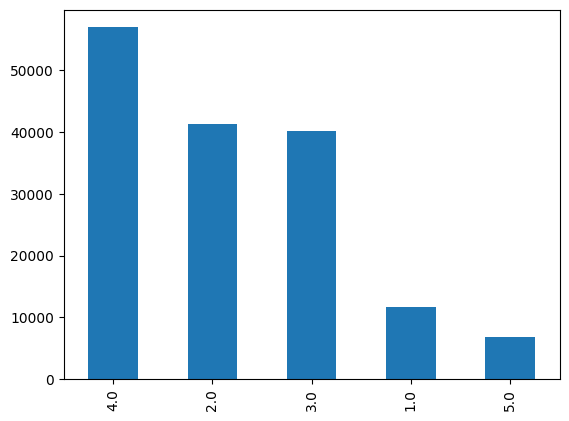

In [106]:
df['Vehicle Damage Extent'].value_counts().plot(kind='bar')

In [127]:
df['Severe'] = (df['Injury Severity'] + df['Vehicle Damage Extent'])//2

In [148]:
f = df.drop(columns=['Crash Date/Time',
                 'Traffic Control',
                 'Driver Substance Abuse',
                 'Non-Motorist Substance Abuse',
                 'Driver At Fault',
                 'Circumstance',
                 'Driver Distracted By',
                 'Drivers License State',
                 'Vehicle Body Type',
                 'Vehicle Continuing Dir',
                 'Vehicle Going Dir',
                 'Parked Vehicle',
                 'Vehicle Year',
                 'Vehicle Make',
                 'DateDash',
                 'Injury Severity',
                 'Vehicle Damage Extent',
                 'Severe',
                #  'Latitude',
                #  'Longitude'
                 ])

In [149]:
ddf = f.dropna(axis=0)

In [150]:
f.head()

,ACRS Report Type,Weather,Light,Speed Limit,Latitude,Longitude,isWeekend,Time,Time_Class,isHoliday
0,1,3.0,4.0,15,39.103518,-77.157669,0,720,8,0
1,1,4.0,1.0,35,39.154847,-77.271245,0,200,2,0
2,1,3.0,4.0,0,39.020303,-77.011436,0,1230,13,0
3,1,3.0,4.0,25,39.080062,-77.097845,1,1539,16,0
4,2,4.0,4.0,25,39.175230,-77.241090,0,915,10,0


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ddf.iloc[:,1:].values,ddf.iloc[:,0].values,test_size=0.15,random_state=1)

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RandomForestClassifier().fit(X_train,y_train)
y_pred = RandomForestClassifier().predict(X_test)
accuracy_score(y_test,y_pred)

0.8834544677212484